In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from neuralprophet import NeuralProphet
from neuralprophet import NeuralProphet, set_log_level
import os
import seaborn as sns
from datetime import datetime
from sklearn.metrics import r2_score as R2, mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from scipy.stats import pearsonr
import pickle

c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning_fabric\__init__.py:29: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
Data=pd.read_excel('Dataset\Full_Dataset.xlsx','3 months').set_index('Date')
Data

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\F'

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\F'

WARNING - (py.warnings._showwarnmsg) - C:\Users\MacGy\AppData\Local\Temp\ipykernel_15616\2531877528.py:1: SyntaxWarning: invalid escape sequence '\F'
  Data=pd.read_excel('Dataset\Full_Dataset.xlsx','3 months').set_index('Date')



,SPI,SPEI,Run-OFF,Precipitation,Mean Temperature,Potential Evotranspiration,Actual Evotranspiration
Date,,,,,,,
1952-01-01,0.451000,0.368429,29.079582,106.409429,6.268371,9.051861,9.051861
1952-02-01,0.383143,0.392286,15.299423,58.405548,6.401405,9.446010,9.446010
1952-03-01,0.396429,0.487000,2.276648,13.671870,9.787082,23.309712,23.309712
1952-04-01,-1.007143,-1.034714,4.336776,25.506944,15.300043,52.136984,52.001133
1952-05-01,-1.768143,-1.600000,4.087862,24.272139,18.001327,76.262205,50.534530
...,...,...,...,...,...,...,...
2022-08-01,-0.740857,-1.453429,9.521211,22.477953,25.847249,91.227933,12.987895
2022-09-01,-0.509714,-0.927286,15.615986,38.995004,21.359743,58.317054,23.381008
2022-10-01,-1.920571,-1.935286,0.895385,2.098628,18.521691,42.325631,1.204008


## Dataset Correlation Matrix

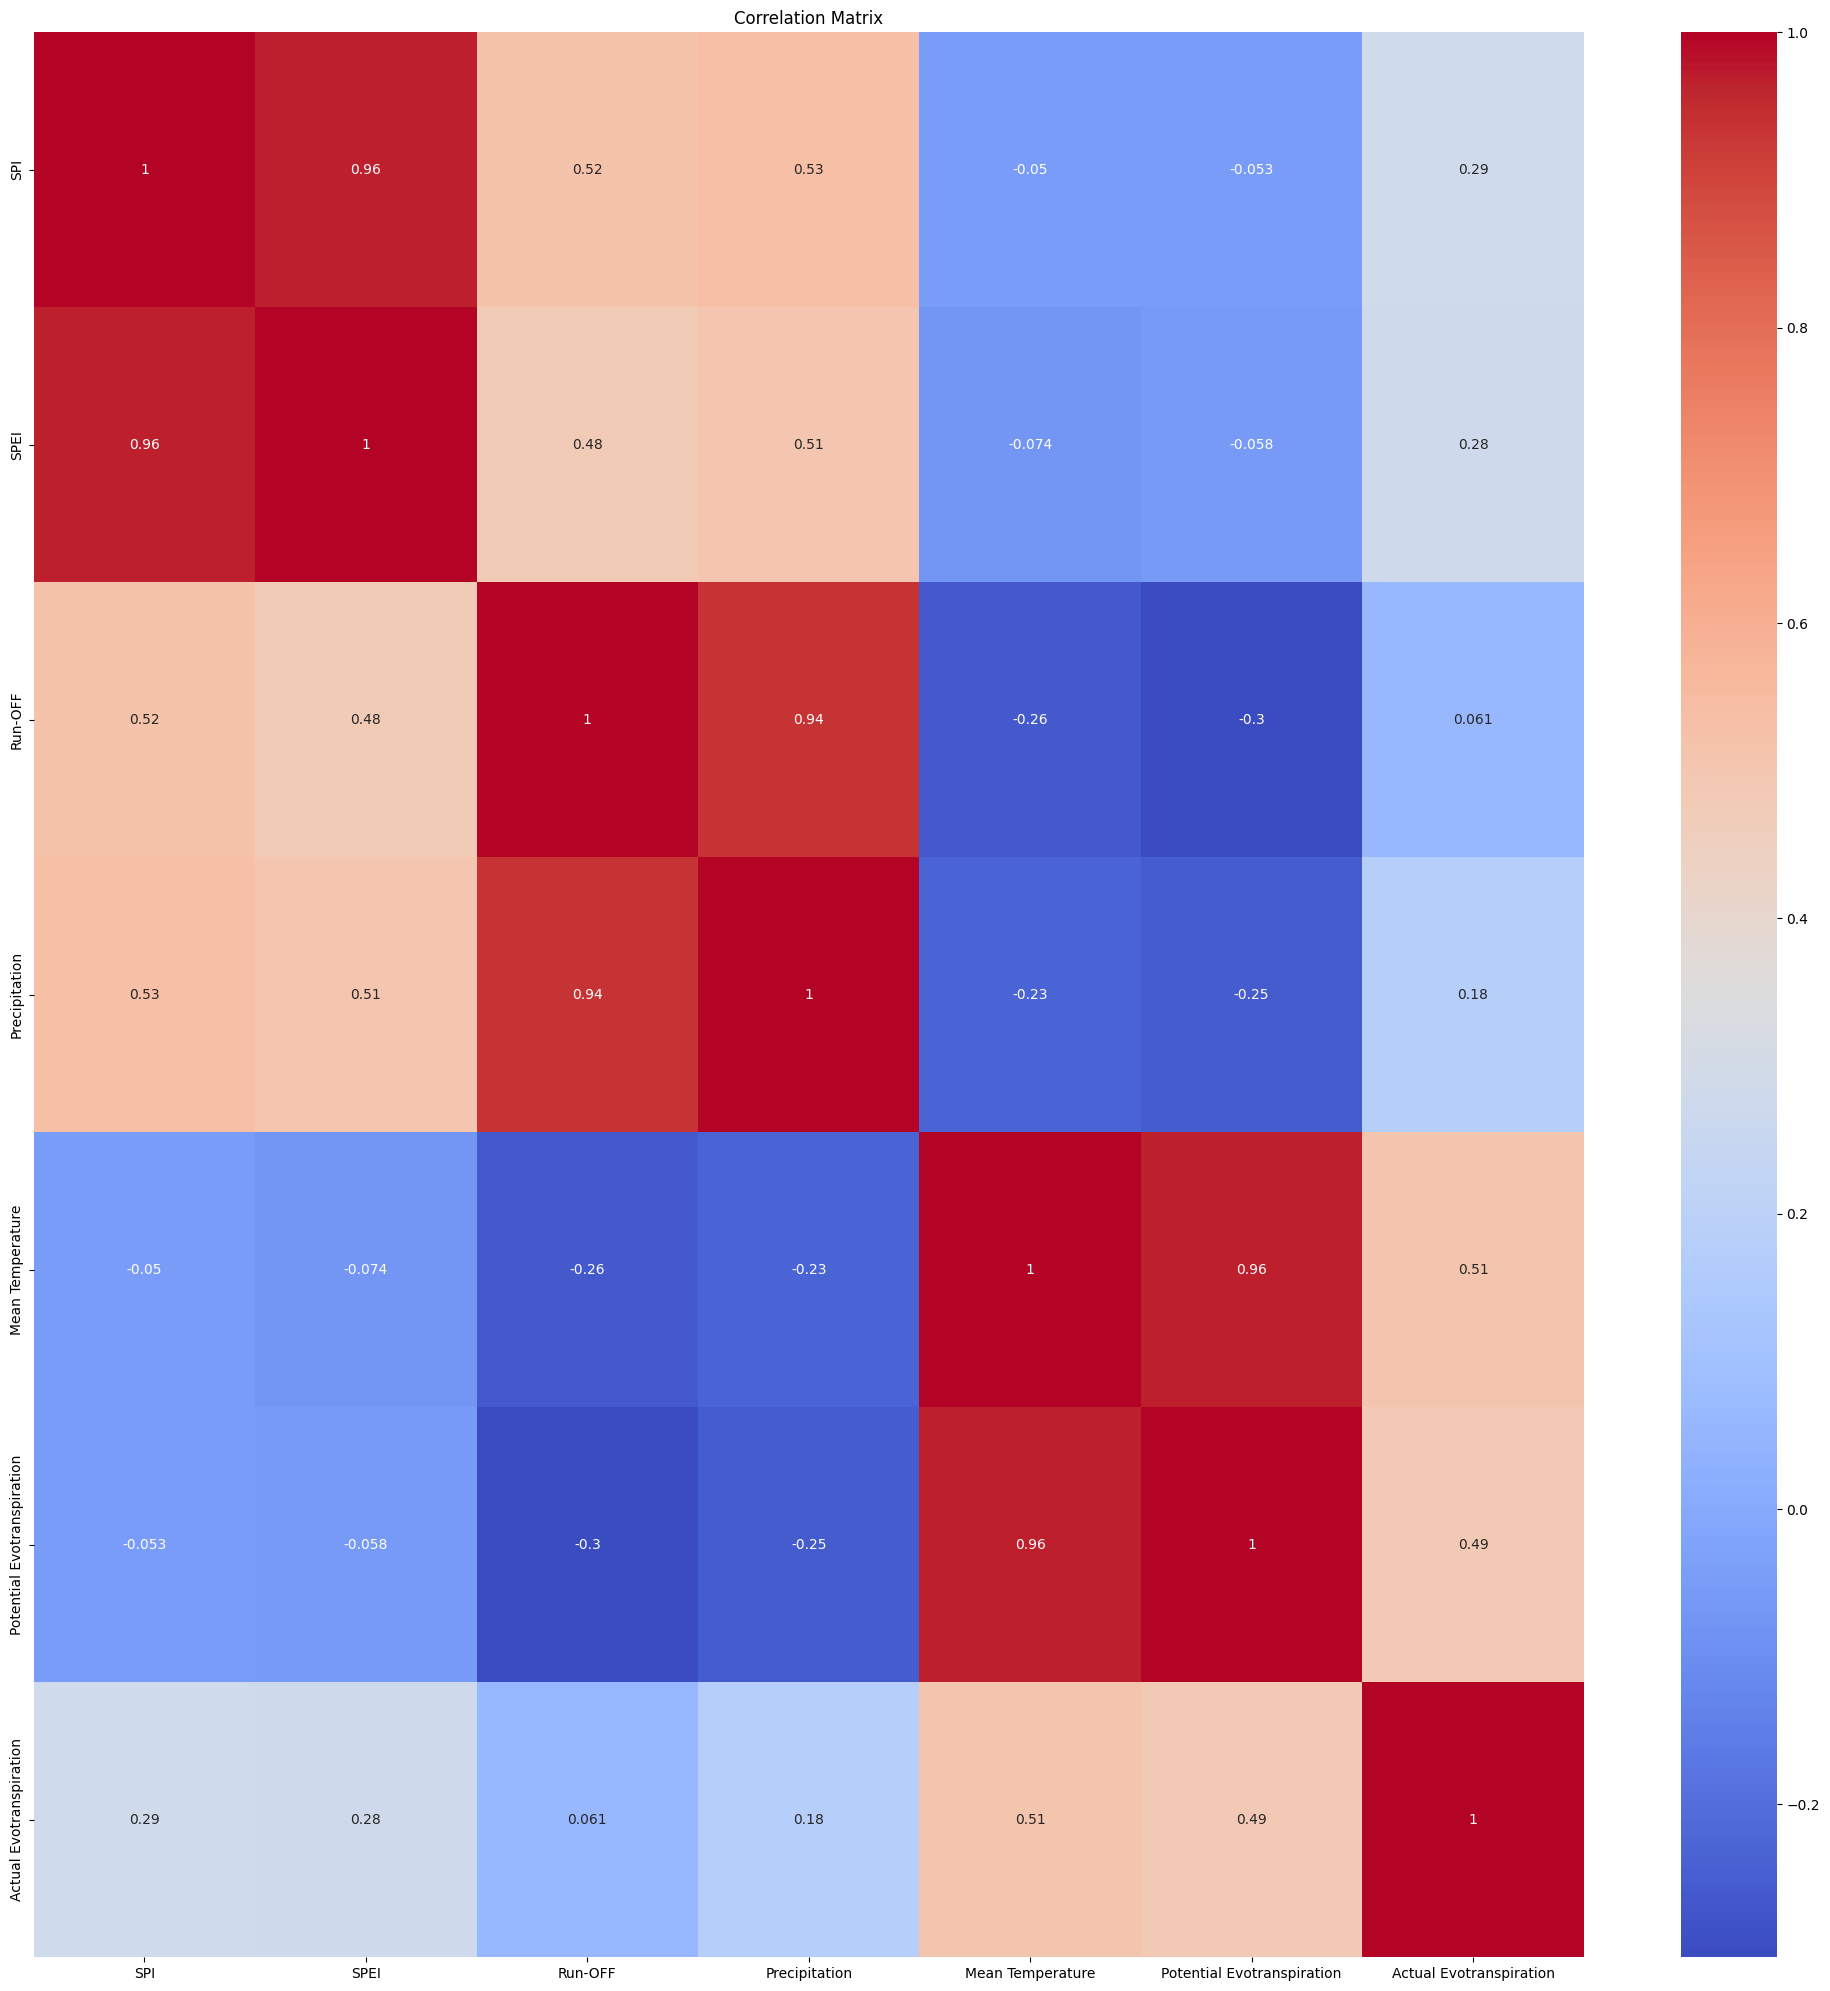

In [3]:
plt.figure(figsize=(25, 25))
correlation_matrix = Data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## SPEI FORECASTING MODEL

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True)

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.883]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be re

Predicting: 21it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


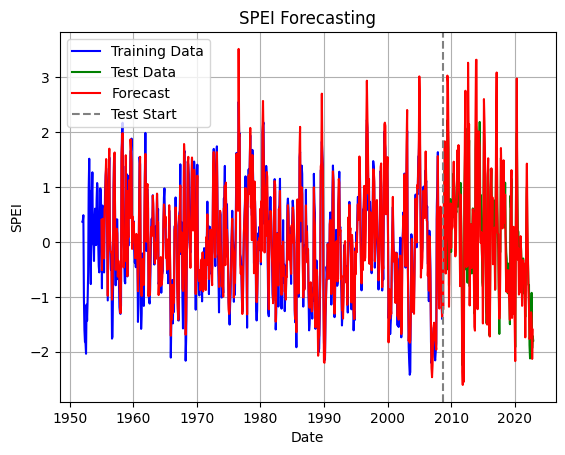

In [4]:
np.NaN = np.nan
df=Data.reset_index()

df['ds'] = df['Date']  # Prophet format date column ('ds')
target_indices = ['SPEI']  
regressors = [ 'Precipitation',  'Actual Evotranspiration'] # Other indexes as input
regressors2 = [ 'Run-OFF','Mean Temperature', 'Potential Evotranspiration']  # Other indexes as input

df=df.drop(columns=['SPI','Date'])

df=df.rename(columns={'SPEI':'y'})

df["summer"] = 0
df.loc[df["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df["winter"] = 0
df.loc[df["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df["fall"] = 0
df.loc[df["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df["spring"] = 0
df.loc[df["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1

l=round(df.index[-1]*0.8)
df_train=df.loc[0:l]
df_val=df.loc[l+1:]

m2 = NeuralProphet(     #growth="off",
                       yearly_seasonality=False,
                       weekly_seasonality=False,
                       daily_seasonality=False,
                       n_lags=3*12,
                       ar_layers=3*[12],
                       learning_rate=0.01,
                       epochs=150
                       )

for reg in regressors:  
    m2.add_future_regressor(name=reg)
for reg in regressors2:  
    m2.add_lagged_regressor(names=reg, n_lags=3*12)


m2.add_seasonality(name="summer_weekly", period=6, fourier_order=12, condition_name="summer")
m2.add_seasonality(name="winter_weekly", period=6, fourier_order=12, condition_name="winter")
m2.add_seasonality(name="spring_weekly", period=6, fourier_order=12, condition_name="spring")
m2.add_seasonality(name="fall_weekly", period=6, fourier_order=12, condition_name="fall")

metrics = m2.fit(df_train, freq='M', validation_df=df_val)
forecast = m2.predict(df)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecast', color='red')  
plt.title(f'SPEI Forecasting')
plt.xlabel('Date')
plt.ylabel('SPEI')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

## SPEI Heavyrain forecasting

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\F'

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\F'

WARNING - (py.warnings._showwarnmsg) - C:\Users\MacGy\AppData\Local\Temp\ipykernel_15616\1987164045.py:1: SyntaxWarning: invalid escape sequence '\F'
  Data2=pd.read_excel('Dataset\Full_Dataset_Heavyrain.xlsx','3 months').set_index('Date')

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.883]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_u

Predicting: 21it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


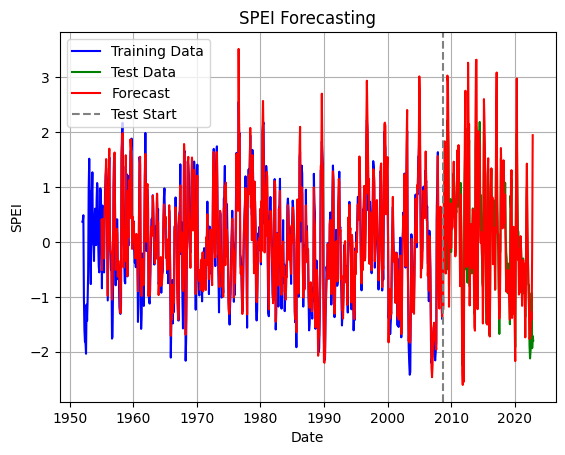

In [5]:
Data2=pd.read_excel('Dataset\Full_Dataset_Heavyrain.xlsx','3 months').set_index('Date')

df2=Data2.reset_index()

df2['ds'] = df2['Date']  # Prophet format date column ('ds')
df2=df2.drop(columns=['SPI','Date','Unnamed: 8'])
#df=df.drop(columns=regressors)
df2=df2.rename(columns={'SPEI':'y'})

df2["summer"] = 0
df2.loc[df2["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df2["winter"] = 0
df2.loc[df2["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df2["fall"] = 0
df2.loc[df2["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df2["spring"] = 0
df2.loc[df2["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1


forecast1 = m2.predict(df2)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast1['ds'], forecast1['yhat1'], label='Forecast', color='red')  # Parte nota
plt.title(f'SPEI Forecasting')
plt.xlabel('Date')
plt.ylabel('SPEI')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

## SPEI Heatwave forecasting

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\F'

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\F'

WARNING - (py.warnings._showwarnmsg) - C:\Users\MacGy\AppData\Local\Temp\ipykernel_15616\1048845935.py:1: SyntaxWarning: invalid escape sequence '\F'
  Data3=pd.read_excel('Dataset\Full_Dataset_Heatwave.xlsx','3 months').set_index('Date')

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.883]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_ut

Predicting: 21it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


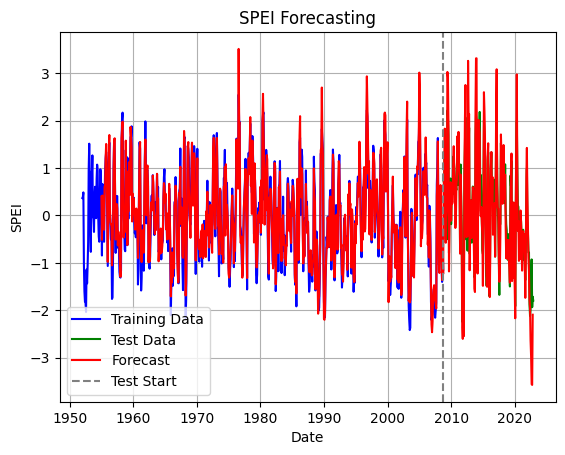

In [6]:
Data3=pd.read_excel('Dataset\Full_Dataset_Heatwave.xlsx','3 months').set_index('Date')

df3=Data3.reset_index()

df3['ds'] = df3['Date']  # Prophet format date column ('ds')
df3=df3.drop(columns=['SPI','Date'])

df3=df3.rename(columns={'SPEI':'y'})


df3["summer"] = 0
df3.loc[df3["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df3["winter"] = 0
df3.loc[df3["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df3["fall"] = 0
df3.loc[df3["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df3["spring"] = 0
df3.loc[df3["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1


forecast2 = m2.predict(df3)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast2['ds'], forecast2['yhat1'], label='Forecast', color='red')  # Parte nota
plt.title(f'SPEI Forecasting')
plt.xlabel('Date')
plt.ylabel('SPEI')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

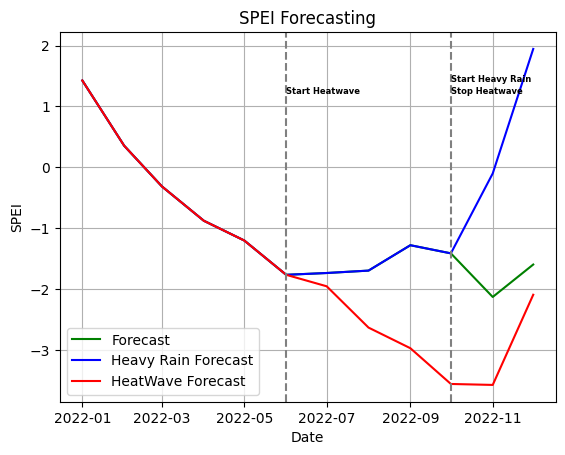

In [7]:

plt.plot(df2['ds'][-12:], forecast['yhat1'][-12:], label='Forecast', color='green')  
plt.plot(df2['ds'][-12:], forecast1['yhat1'][-12:], label='Heavy Rain Forecast', color='blue')   
plt.plot(df2['ds'][-12:], forecast2['yhat1'][-12:], label='HeatWave Forecast', color='red')   
plt.title(f'SPEI Forecasting')
plt.xlabel('Date')
plt.ylabel('SPEI')
plt.axvline(x=df2['ds'][len(df2['ds'])-7], color='gray', linestyle='--')
plt.axvline(x=df2['ds'][len(df2['ds'])-3], color='gray', linestyle='--')
plt.text(df2['ds'][len(df2['ds'])-7],1.2, 'Start Heatwave', fontsize = 6,weight='bold')
plt.text(df2['ds'][len(df2['ds'])-3], 1.2, 'Stop Heatwave', fontsize = 6,weight='bold')
plt.text(df2['ds'][len(df2['ds'])-3], 1.4, 'Start Heavy Rain', fontsize = 6,weight='bold')
plt.legend()
plt.grid()
plt.show()

In [8]:
corr, _ = pearsonr(df_val['y'][0:-1], forecast['yhat1'][l+1:])
cc=R2(df_val['y'][0:-1], forecast['yhat1'][l+1:])
rmse=np.sqrt(MSE(df_val['y'][0:-1], forecast['yhat1'][l+1:]))
mae=MAE(df_val['y'][0:-1], forecast['yhat1'][l+1:])
mape=MAPE(df_val['y'][0:-1], forecast['yhat1'][l+1:])

print(corr,cc,rmse,mae,mape)



0.9553692376212243 0.8543714719139435 0.40997334003845476 0.3173534989004275 1.010370124377904


## SPI Forecasting model

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True)

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.883]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be re

Predicting: 21it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


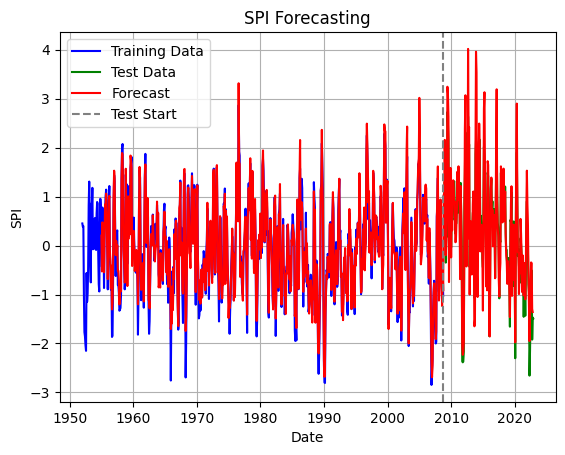

In [9]:
df=Data.reset_index()

df['ds'] = df['Date']  # Prophet format date column ('ds')
target_indices = ['SPI']  
regressors = [ 'Precipitation',  'Actual Evotranspiration']  # Other indexes as input
regressors2 = [ 'Run-OFF','Mean Temperature', 'Potential Evotranspiration']  # Other indexes as input

df=df.drop(columns=['SPEI','Date'])
#df=df.drop(columns=regressors)
df=df.rename(columns={'SPI':'y'})

df["summer"] = 0
df.loc[df["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df["winter"] = 0
df.loc[df["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df["fall"] = 0
df.loc[df["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df["spring"] = 0
df.loc[df["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1

l=round(df.index[-1]*0.8)
df_train=df.loc[0:l]
df_val=df.loc[l+1:]

m = NeuralProphet(     #growth="off",
                       yearly_seasonality=False,
                       weekly_seasonality=False,
                       daily_seasonality=False,
                       n_lags=3*12,
                       ar_layers=3*[12],
                       learning_rate=0.01,
                       epochs=150
                       )

for reg in regressors:  
    #m.add_lagged_regressor(names=reg, n_lags=3*12)
    m.add_future_regressor(name=reg)
for reg in regressors2:  
    m.add_lagged_regressor(names=reg, n_lags=3*12)
    #m2.add_future_regressor(name=reg)   

m.add_seasonality(name="summer_weekly", period=6, fourier_order=12, condition_name="summer")
m.add_seasonality(name="winter_weekly", period=6, fourier_order=12, condition_name="winter")
m.add_seasonality(name="spring_weekly", period=6, fourier_order=12, condition_name="spring")
m.add_seasonality(name="fall_weekly", period=6, fourier_order=12, condition_name="fall")

metrics = m.fit(df_train, freq='M', validation_df=df_val)
forecast = m.predict(df)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecast', color='red')  # Parte nota
plt.title(f'SPI Forecasting')
plt.xlabel('Date')
plt.ylabel('SPI')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

## SPI Heavyrain forecastin

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.883]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be re

Predicting: 21it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


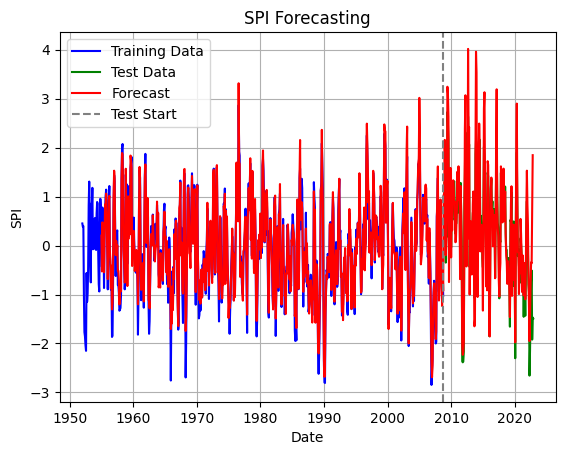

In [10]:

df2=Data2.reset_index()

df2['ds'] = df2['Date']  # Prophet format date column ('ds')
df2=df2.drop(columns=['SPEI','Date','Unnamed: 8'])
#df=df.drop(columns=regressors)
df2=df2.rename(columns={'SPI':'y'})

df2["summer"] = 0
df2.loc[df2["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df2["winter"] = 0
df2.loc[df2["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df2["fall"] = 0
df2.loc[df2["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df2["spring"] = 0
df2.loc[df2["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1


forecast1 = m.predict(df2)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast1['ds'], forecast1['yhat1'], label='Forecast', color='red')  # Parte nota
plt.title(f'SPI Forecasting')
plt.xlabel('Date')
plt.ylabel('SPI')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

## SPI Heatwave forecasting

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.883]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be re

Predicting: 21it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


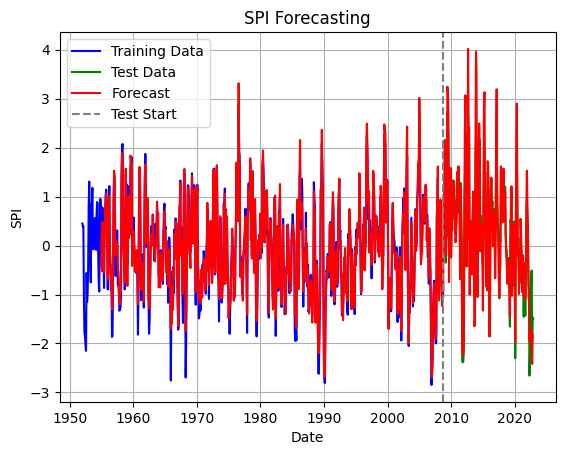

In [11]:

df3=Data3.reset_index()

df3['ds'] = df3['Date']  
df3=df3.drop(columns=['SPEI','Date'])
#df=df.drop(columns=regressors)
df3=df3.rename(columns={'SPI':'y'})

df3["summer"] = 0
df3.loc[df3["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df3["winter"] = 0
df3.loc[df3["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df3["fall"] = 0
df3.loc[df3["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df3["spring"] = 0
df3.loc[df3["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1


forecast2 = m.predict(df3)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast2['ds'], forecast2['yhat1'], label='Forecast', color='red')  # Parte nota
plt.title(f'SPI Forecasting')
plt.xlabel('Date')
plt.ylabel('SPI')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

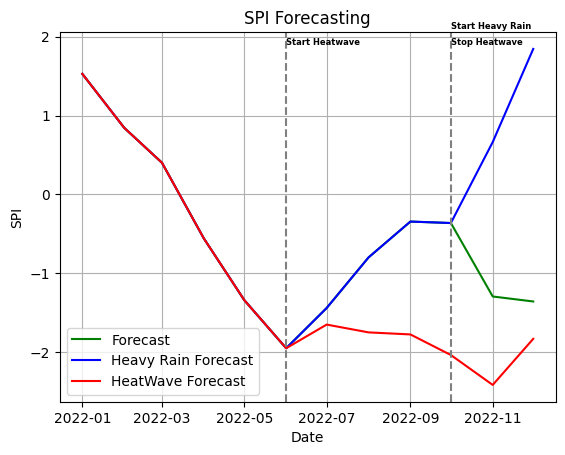

In [12]:
# heavyrain heatwave comparison
plt.plot(df2['ds'][-12:], forecast['yhat1'][-12:], label='Forecast', color='green')  # Parte nota
plt.plot(df2['ds'][-12:], forecast1['yhat1'][-12:], label='Heavy Rain Forecast', color='blue')  # Parte nota
plt.plot(df2['ds'][-12:], forecast2['yhat1'][-12:], label='HeatWave Forecast', color='red')  # Parte nota
plt.title(f'SPI Forecasting')
plt.xlabel('Date')
plt.ylabel('SPI')
plt.axvline(x=df2['ds'][len(df2['ds'])-7], color='gray', linestyle='--')
plt.axvline(x=df2['ds'][len(df2['ds'])-3], color='gray', linestyle='--')
plt.text(df2['ds'][len(df2['ds'])-7],1.9, 'Start Heatwave', fontsize = 6,weight='bold')
plt.text(df2['ds'][len(df2['ds'])-3], 1.9, 'Stop Heatwave', fontsize = 6,weight='bold')
plt.text(df2['ds'][len(df2['ds'])-3], 2.1, 'Start Heavy Rain', fontsize = 6,weight='bold')
plt.legend()
plt.grid()
plt.show()

In [13]:
corr, _ = pearsonr(df_val['y'][0:-1], forecast['yhat1'][l+1:])

cc=R2(df_val['y'][0:-1], forecast['yhat1'][l+1:])
rmse=np.sqrt(MSE(df_val['y'][0:-1], forecast['yhat1'][l+1:]))
mae=MAE(df_val['y'][0:-1], forecast['yhat1'][l+1:])
mape=MAPE(df_val['y'][0:-1], forecast['yhat1'][l+1:])

print(corr,cc,rmse,mae,mape)


0.9356225943012711 0.8163696012469751 0.46581251437869386 0.35472579245950264 0.9670160024589057


## Starting Forecasting Available water

In [14]:
Data4=pd.read_excel('Dataset\Big_Bang_index.xlsx','Foglio1').set_index('Date')
Data4=Data4.rename(columns={'Q_tronto':'Q_Tot'})
Data4

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\B'

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\B'

WARNING - (py.warnings._showwarnmsg) - C:\Users\MacGy\AppData\Local\Temp\ipykernel_15616\1608014070.py:1: SyntaxWarning: invalid escape sequence '\B'
  Data4=pd.read_excel('Dataset\Big_Bang_index.xlsx','Foglio1').set_index('Date')



,SPI,SPEI,SPI3,SPEI3,SPI6,SPEI6,SPI12,SPEI12,Q_Tot
Date,,,,,,,,,
2013-01-01,0.664000,0.609571,0.340286,0.125000,1.425286,1.135857,2.229714,1.658286,10.558602
2013-02-01,0.049857,0.156429,0.400571,0.318857,1.639000,1.580286,1.320286,0.756857,12.402228
2013-03-01,0.252000,0.229714,0.373571,0.313143,-0.167000,-0.510714,1.471714,0.956571,20.725274
2013-04-01,-0.901143,-1.274143,-0.423143,-0.573286,-0.076286,-0.496000,1.111429,0.495286,22.933217
2013-05-01,1.318429,1.317714,0.379571,0.239000,0.486714,0.307143,1.475571,0.899429,15.196393
...,...,...,...,...,...,...,...,...,...
2022-08-01,-0.302143,-0.630571,-0.740857,-1.453429,-2.127571,-2.068857,-1.299571,-1.697429,7.107734
2022-09-01,-0.396571,-0.531429,-0.509714,-0.927286,-1.571143,-1.804000,-0.918571,-1.358286,6.165697
2022-10-01,-2.669286,-1.992143,-1.920571,-1.935286,-2.261571,-2.665857,-1.786000,-2.060714,6.519087


## Correlation analysis for best index selection

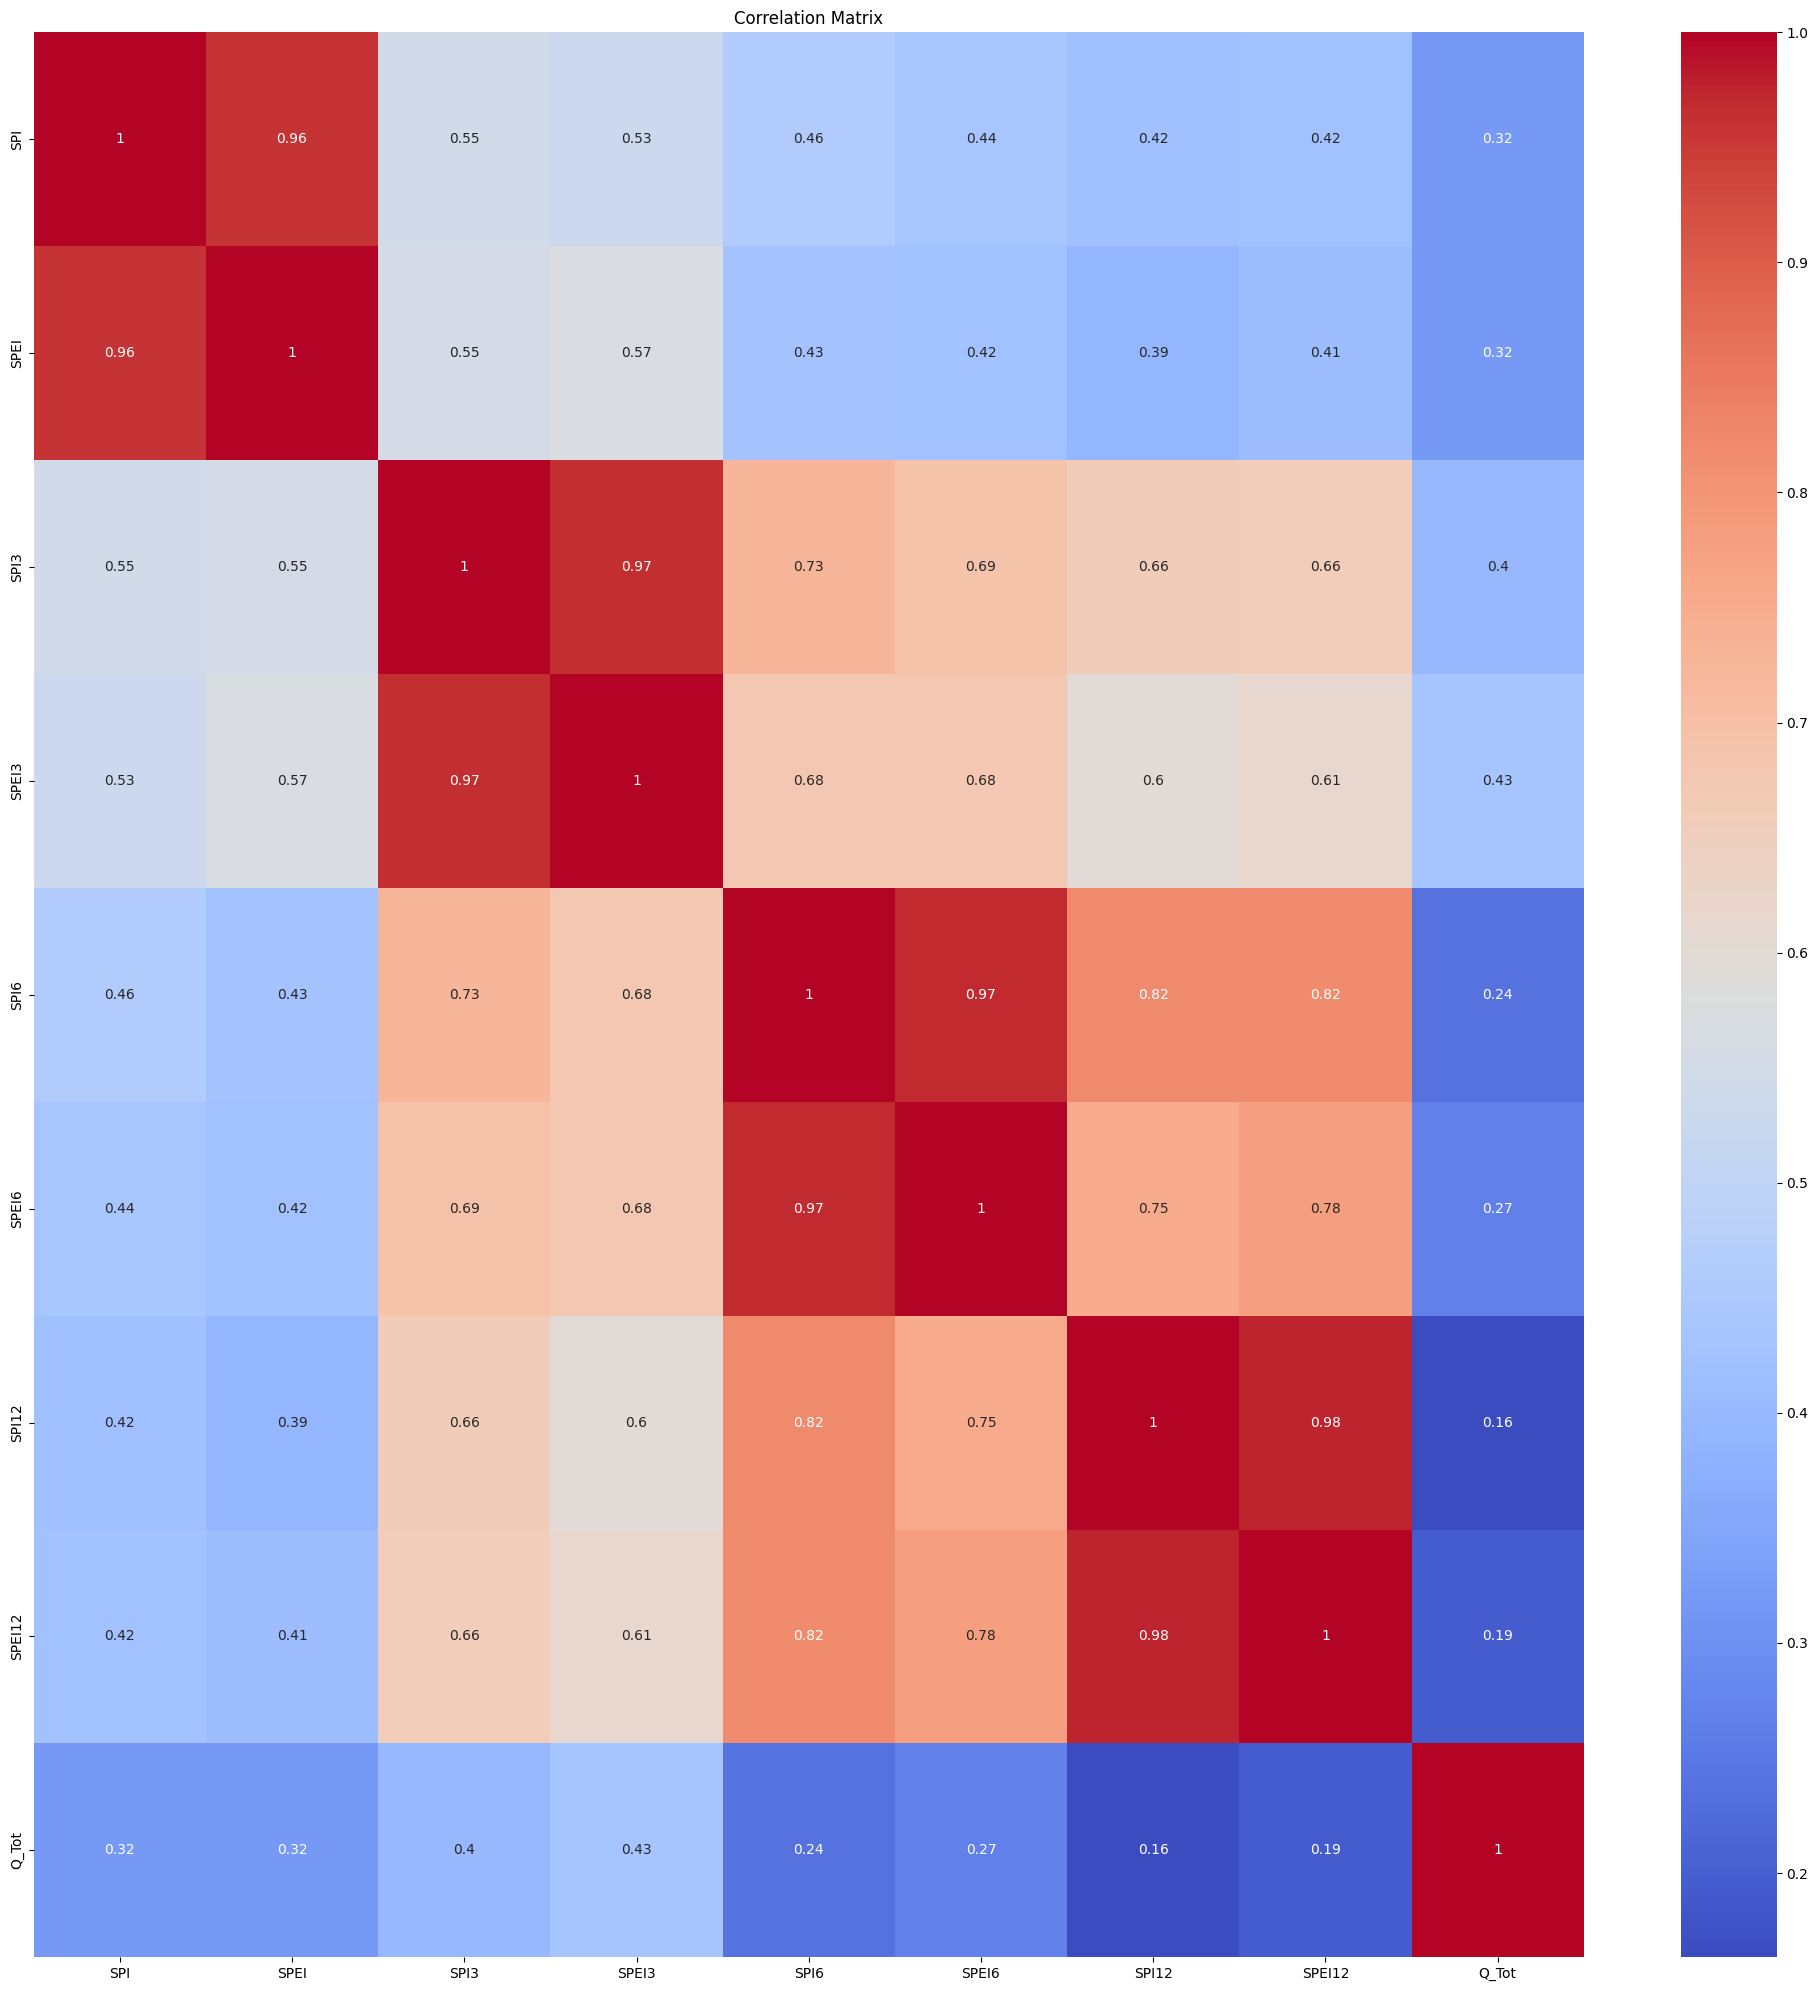

In [15]:
plt.figure(figsize=(25, 25))
correlation_matrix = Data4.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [16]:
Data5=pd.read_excel('Dataset\Idro_Dataset.xlsx').set_index('Date')
DATA5=Data5.drop(columns=['Q_tronto','Potential Evotranspiration','Q_Disp'])
Data5

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\I'

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\I'

WARNING - (py.warnings._showwarnmsg) - C:\Users\MacGy\AppData\Local\Temp\ipykernel_15616\439470687.py:1: SyntaxWarning: invalid escape sequence '\I'
  Data5=pd.read_excel('Dataset\Idro_Dataset.xlsx').set_index('Date')



,SPI3,SPEI3,Run-OFF,Precipitation,Mean Temperature,Potential Evotranspiration,Actual Evotranspiration,Q_tot,Q_tronto,Q_Disp
Date,,,,,,,,,,
2013-01-01,0.340286,0.125000,33.488063,74.159768,8.002167,9.954101,9.954101,10.843006,10.558602,5.803006
2013-02-01,0.400571,0.318857,19.210758,43.368864,6.957208,8.028076,8.028076,12.605535,12.402228,6.795535
2013-03-01,0.373571,0.313143,25.239126,59.332718,10.303889,18.822127,18.822127,20.926731,20.725274,15.116731
2013-04-01,-0.423143,-0.573286,9.136670,23.840850,15.100850,37.952685,37.952685,23.045023,22.933217,18.005023
2013-05-01,0.379571,0.239000,32.588513,85.486756,17.551040,54.444372,54.444372,15.308199,15.196393,10.268199
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,-0.740857,-1.453429,9.521211,22.477953,25.847249,91.227933,12.987895,7.219539,7.107734,3.349539
2022-09-01,-0.509714,-0.927286,15.615986,38.995004,21.359743,58.317054,23.381008,6.277503,6.165697,2.407503
2022-10-01,-1.920571,-1.935286,0.895385,2.098628,18.521691,42.325631,1.204008,6.630892,6.519087,2.760892


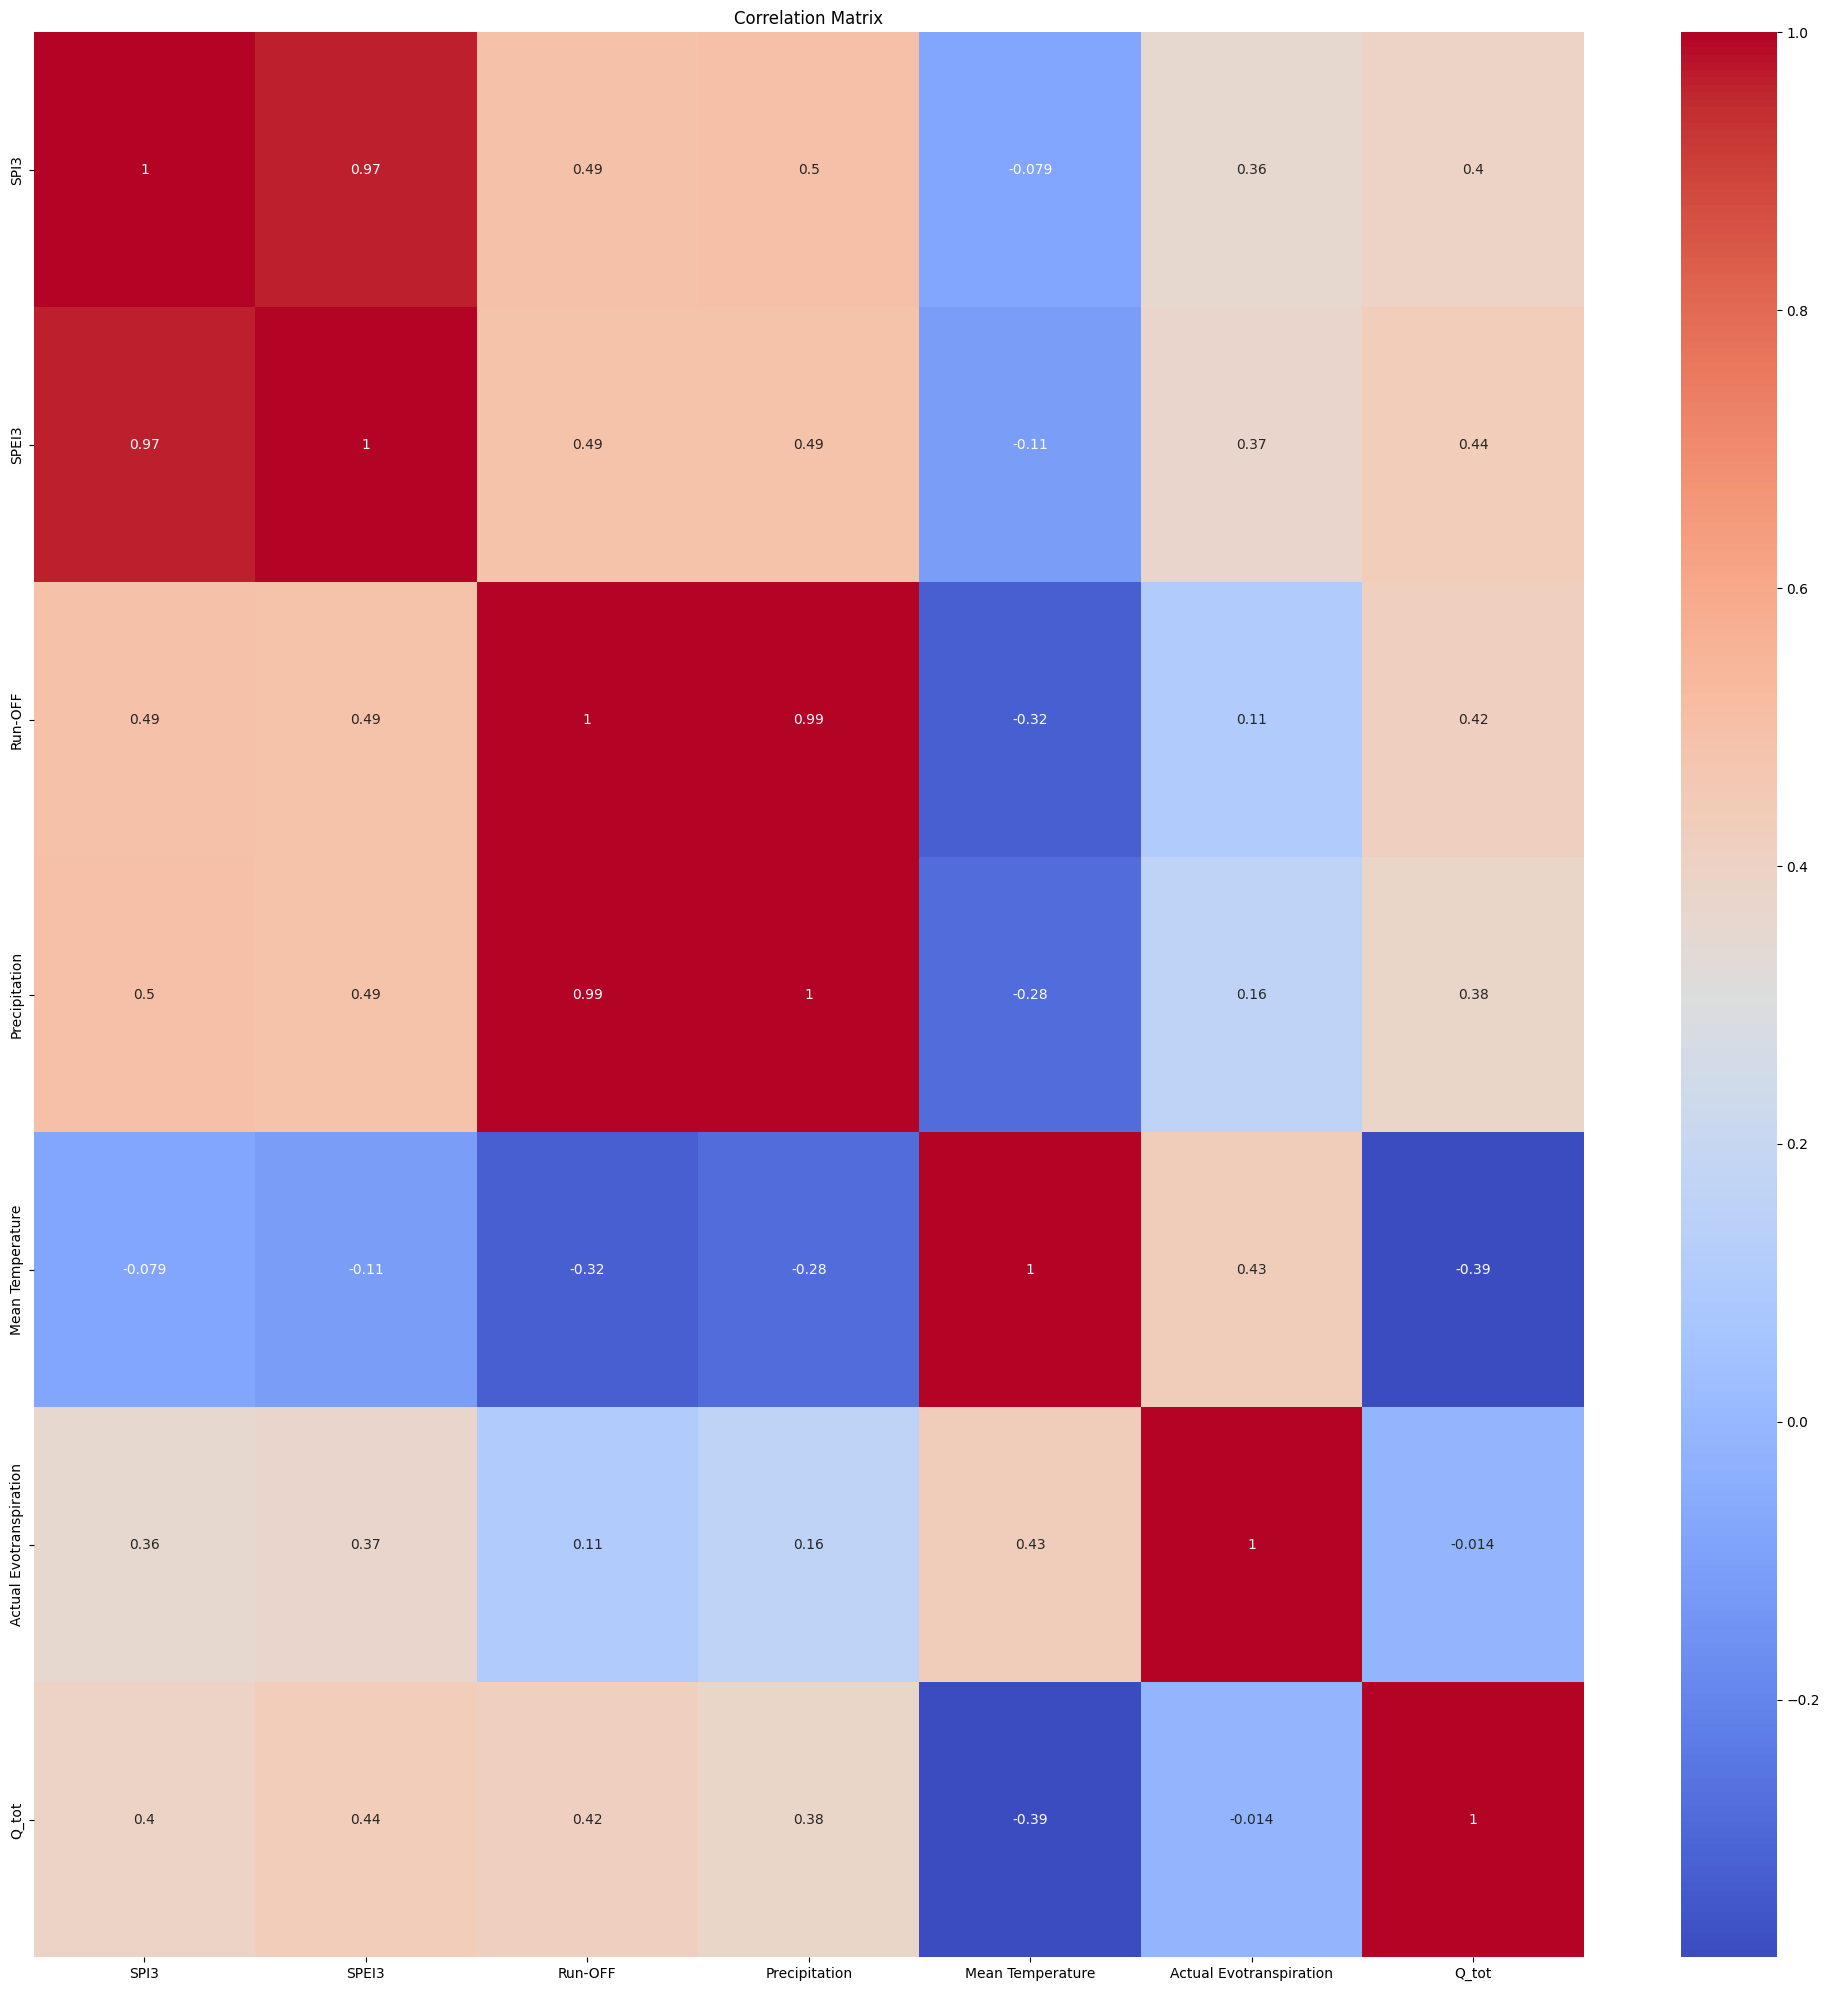

In [17]:
#correlation
plt.figure(figsize=(25, 25))
correlation_matrix = DATA5.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True)

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.167]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be re

Predicting: 12it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


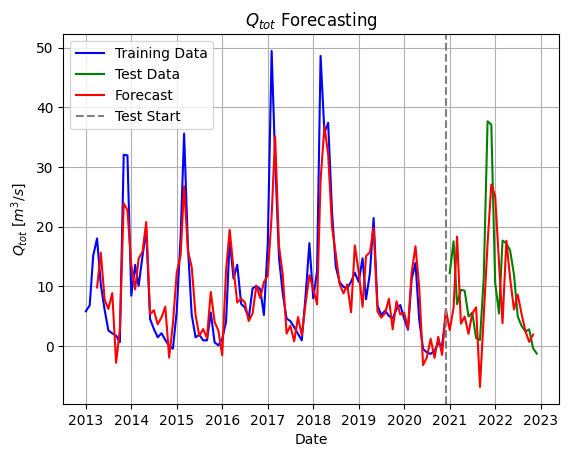

In [29]:

df=Data5.reset_index()

df['ds'] = df['Date']  #
target_indices = ['Q_Disp'] 
regressors = ['Actual Evotranspiration']  #
regressors2 = [ 'Run-OFF','Mean Temperature', 'Potential Evotranspiration']  
regressors3 = [ 'Q_tronto']  #
regressors4 = [ 'Precipitation']  

df=df.drop(columns=['SPI3','SPEI3','Date','Q_tot'])
df=df.drop(columns=regressors)
df=df.drop(columns=regressors2)
#df=df.drop(columns=regressors)
df=df.rename(columns={'Q_Disp':'y'})

df["summer"] = 0
df.loc[df["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df["winter"] = 0
df.loc[df["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df["fall"] = 0
df.loc[df["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df["spring"] = 0
df.loc[df["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1

l=round(df.index[-1]*0.8)
df_train=df.loc[0:l]
df_val=df.loc[l+1:]
m4 = NeuralProphet(    #growth="off",
                       yearly_seasonality=False,
                       weekly_seasonality=False,
                       daily_seasonality=False,
                       n_lags=3,
                       ar_layers=1*[12],
                       learning_rate=0.002,
                       epochs=400
                       )

for reg in regressors4:  
    m4.add_future_regressor(name=reg)

for reg in regressors3:  
    m4.add_lagged_regressor(names=reg, n_lags=3)

m4.add_seasonality(name="summer_weekly", period=6, fourier_order=12, condition_name="summer")
m4.add_seasonality(name="winter_weekly", period=6, fourier_order=12, condition_name="winter")
m4.add_seasonality(name="spring_weekly", period=6, fourier_order=12, condition_name="spring")
m4.add_seasonality(name="fall_weekly", period=6, fourier_order=12, condition_name="fall")

metrics = m4.fit(df_train, freq='M', validation_df=df_val)
forecast = m4.predict(df)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecast', color='red')  # Parte nota
plt.title('$Q_{tot}$ Forecasting')
plt.xlabel('Date')
plt.ylabel('$Q_{tot}$ [$m^3/s$]')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

In [30]:

#model saving
with open("modello_neuralprophet.pkl", "wb") as f:
    pickle.dump(m4, f)


In [31]:
#index analysis
cc=R2(df_val['y'][0:-1], forecast['yhat1'][l+1:])
rmse=np.sqrt(MSE(df_val['y'][0:-1], forecast['yhat1'][l+1:]))
mae=MAE(df_val['y'][0:-1], forecast['yhat1'][l+1:])
mape=MAPE(df_val['y'][0:-1], forecast['yhat1'][l+1:])
corr, _ = pearsonr(df_val['y'][0:-1], forecast['yhat1'][l+1:])

print(corr,cc,rmse,mae,mape)


0.6147216767789911 0.27455222421345693 8.374679205803655 6.6556593123530945 1.3294901972940742


## Available water HeavyRain Forecasting

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\I'

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\I'

WARNING - (py.warnings._showwarnmsg) - C:\Users\MacGy\AppData\Local\Temp\ipykernel_15616\1001323055.py:1: SyntaxWarning: invalid escape sequence '\I'
  Data6=pd.read_excel('Dataset\Idro_Dataset_Heavyrain.xlsx').set_index('Date')

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.167]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:115

Predicting: 12it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


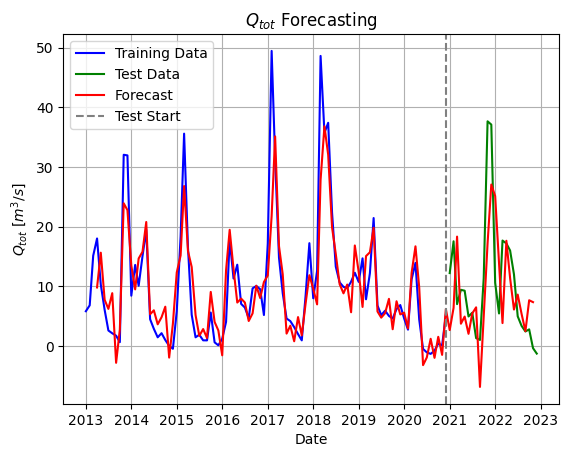

In [32]:
Data6=pd.read_excel('Dataset\Idro_Dataset_Heavyrain.xlsx').set_index('Date')

df6=Data6.reset_index()
# Assicurati che ci siano colonne "ds" per data e "y" per il valore target
# Adatta questo codice in base ai nomi delle colonne del tuo dataset
df6['ds'] = df6['Date']  # Colonna data in formato Prophet ('ds')
target_indices = ['Q_Disp']  # SPEI Dopo Indici che vogliamo prevedere
regressors = ['Actual Evotranspiration']  # Altri indici come input
regressors2 = [ 'Run-OFF','Mean Temperature', 'Potential Evotranspiration']  # Altri indici come input


df6=df6.drop(columns=['SPI3','SPEI3','Date','Q_tot'])
df6=df6.drop(columns=regressors)
df6=df6.drop(columns=regressors2)
#df=df.drop(columns=regressors)
df6=df6.rename(columns={'Q_Disp':'y'})

df6["summer"] = 0
df6.loc[df6["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df6["winter"] = 0
df6.loc[df6["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df6["fall"] = 0
df6.loc[df6["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df6["spring"] = 0
df6.loc[df6["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1



forecast1 = m4.predict(df6)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast1['ds'], forecast1['yhat1'], label='Forecast', color='red')  # Parte nota
plt.title('$Q_{tot}$ Forecasting')
plt.xlabel('Date')
plt.ylabel('$Q_{tot}$ [$m^3/s$]')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

## Available water Heatwave Forecasting

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\I'

WARNING - (py.warnings._showwarnmsg) - <>:1: SyntaxWarning: invalid escape sequence '\I'

WARNING - (py.warnings._showwarnmsg) - C:\Users\MacGy\AppData\Local\Temp\ipykernel_15616\3320036179.py:1: SyntaxWarning: invalid escape sequence '\I'
  Data7=pd.read_excel('Dataset\Idro_Dataset_Heatwave.xlsx').set_index('Date')

WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.167]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MacGy\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152

Predicting: 12it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


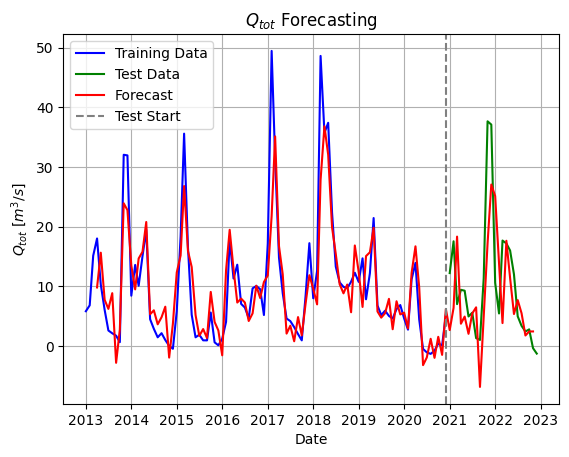

In [33]:
Data7=pd.read_excel('Dataset\Idro_Dataset_Heatwave.xlsx').set_index('Date')

df7=Data7.reset_index()

df7['ds'] = df7['Date']  #
target_indices = ['Q_Disp']  
regressors = ['Actual Evotranspiration']  # Altri indici come input
regressors2 = [ 'Run-OFF','Mean Temperature', 'Potential Evotranspiration']  # Altri indici come input


df7=df7.drop(columns=['SPI3','SPEI3','Date','Q_tot'])
df7=df7.drop(columns=regressors)
df7=df7.drop(columns=regressors2)
#df=df.drop(columns=regressors)
df7=df7.rename(columns={'Q_Disp':'y'})

df7["summer"] = 0
df7.loc[df7["ds"].dt.month.isin([6, 7, 8]), "summer"] = 1
df7["winter"] = 0
df7.loc[df7["ds"].dt.month.isin([12, 1, 2]), "winter"] = 1
df7["fall"] = 0
df7.loc[df7["ds"].dt.month.isin([9, 10, 11]), "fall"] = 1
df7["spring"] = 0
df7.loc[df7["ds"].dt.month.isin([3, 4, 5]), "spring"] = 1



forecast2 = m4.predict(df7)

plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_val['ds'], df_val['y'], label='Test Data', color='green')
plt.plot(forecast2['ds'], forecast2['yhat1'], label='Forecast', color='red')  # Parte nota
plt.title('$Q_{tot}$ Forecasting')
plt.xlabel('Date')
plt.ylabel('$Q_{tot}$ [$m^3/s$]')
plt.axvline(x=df_train['ds'].iloc[-1], color='gray', linestyle='--', label='Test Start')
plt.legend()
plt.grid()
plt.show()

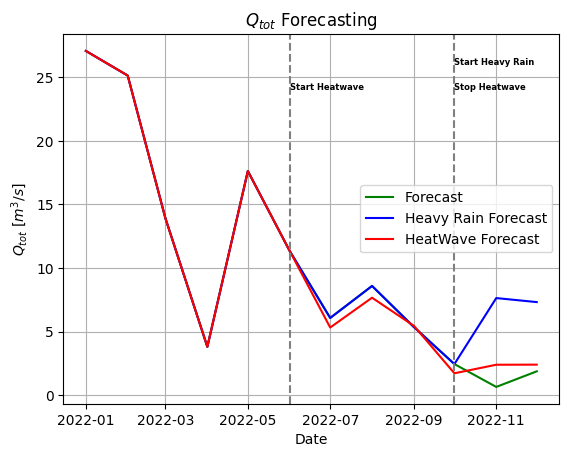

In [34]:
#comparison
plt.plot(df2['ds'][-12:], forecast['yhat1'][-12:], label='Forecast', color='green')  # Parte nota
plt.plot(df2['ds'][-12:], forecast1['yhat1'][-12:], label='Heavy Rain Forecast', color='blue')  # Parte nota
plt.plot(df2['ds'][-12:], forecast2['yhat1'][-12:], label='HeatWave Forecast', color='red')  # Parte nota
plt.title('$Q_{tot}$ Forecasting')
plt.xlabel('Date')
plt.ylabel('$Q_{tot}$ [$m^3/s$]')
plt.axvline(x=df2['ds'][len(df2['ds'])-7], color='gray', linestyle='--')
plt.axvline(x=df2['ds'][len(df2['ds'])-3], color='gray', linestyle='--')
plt.text(df2['ds'][len(df2['ds'])-7],24, 'Start Heatwave', fontsize = 6,weight='bold')
plt.text(df2['ds'][len(df2['ds'])-3], 24, 'Stop Heatwave', fontsize = 6,weight='bold')
plt.text(df2['ds'][len(df2['ds'])-3], 26, 'Start Heavy Rain', fontsize = 6,weight='bold')
plt.legend()
plt.grid()
plt.show()